# Customer Churn Analysis


# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

# Importing necessary libraries


In [1]:
#linear algebra
import numpy as np
 
import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

import joblib



# Loading the Dataset

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem" where we need to predict the several churn using the classification models.

In [3]:
#checking the top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#checking the last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
#checking the sample
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3873,7340-KEFQE,Female,0,Yes,Yes,51,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),34.2,1782,No


# EDA

In [5]:
#Checking the dimension of dataset
df.shape

(7043, 21)

this dataset contain 7043 rows and 21 columns

In [6]:
#checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
#checking the type of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are 3 different datatype are present(int,float,obj)

In [8]:
#CHECKING THE INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Thi gives the brief about the dataset which includes indexing type,column type,no null values and memory usage.

In [9]:
#checking the null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no null values are peresent

<AxesSubplot:>

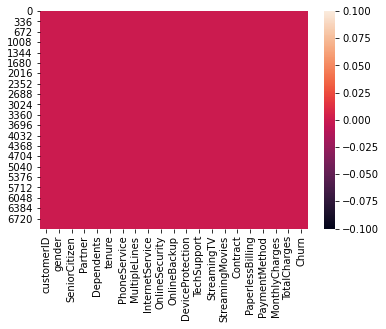

In [10]:
#heatmap for null values
sns.heatmap(df.isnull())

we can  see that no null values are present

In [11]:
#checking the value counts of each columns

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

3877-JRJIP    1
8305-VHZBZ    1
9974-JFBHQ    1
6427-FEFIG    1
6439-PKTRR    1
             ..
9647-ERGBE    1
0665-XHDJU    1
0098-BOWSO    1
0917-EZOLA    1
3148-BLQJT    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

these are the vlaues of all columns and can see blank in totalcharge columns.

In [12]:
#checking the unique values
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can notice that "TotalCharges" has continuous data but its reflecting as object datatype. And 11 records of this column has blank data. Lets handle this column.



In [13]:
#checking the space in totalcolumns

df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this column. Lets fi;l this column by some values

In [14]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.9        8
19.65       8
20.05       8
           ..
4295.35     1
3674.95     1
405.7       1
216.9       1
1618.2      1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
#convertinh the obj datatype to float datatype

df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

we have converted the datatype of "totalcharge" from object to float

In [16]:
#let check null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we have filled blank spaces with nan values in TotalCharges, its showing 11 null values in that column. Replacing the NAN values using mean method as the data has continuous values.

In [17]:
# Checkin the mean of TotalCharges column
print('The mean value of TotalCharges is:',df["TotalCharges"].mean())


The mean value of TotalCharges is: 2283.3004408418697


In [18]:
#filling the null values  with mean of Totalcharge columns
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


<AxesSubplot:>

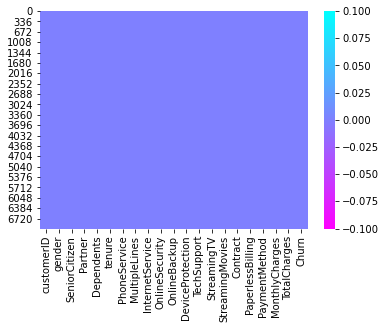

In [19]:
#let's check again
sns.heatmap(df.isnull(),cmap='cool_r')

now we can see no missing values present

In [20]:
#separating the Numerical and categorical columns

#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)


Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
#checking the no. of unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

These are the unique values presnt in the dataset.here customerID columns has the data of unique ID to the customers which can be dropped.

In [22]:
#Dropping cistomerId columns
df.drop('customerID',axis=1,inplace=True)


In [23]:
# Checking the unique values in target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

# Description of Dataset

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/incvalid values present.

From the above description we can observe the following:-

The counts of all the columns are same which means there are no missing values in the dataset.

The mean value is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these column.

The data in the column MonthlyCharges have mean value less than median which means the data is skewed to left.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present int he data.

We can also notice the Standard deviation, min, 25% percentile values from this describe method.

# Data Visualization

# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


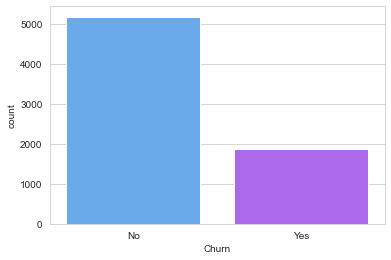

In [50]:
sns.set_style('whitegrid')
print(df['Churn'].value_counts())
sns.countplot(df['Churn'],palette='cool')
plt.show()

We can observe that the count of "No churn" are high compared to the count of "Yes Churn" i.e there are more number of customers who have not churned. This leads to class imbalance issue in the data. we will rectify iy by using oversampling method in later part.



Male      3555
Female    3488
Name: gender, dtype: int64


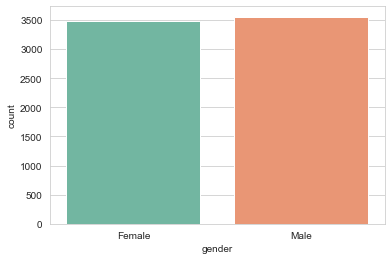

In [51]:
#visualizing the count for gender

print(df['gender'].value_counts())
sns.countplot(df['gender'],palette='Set2')
plt.show()

From the plot we can observe that the total number of males and females are almost same.



0    5901
1    1142
Name: SeniorCitizen, dtype: int64


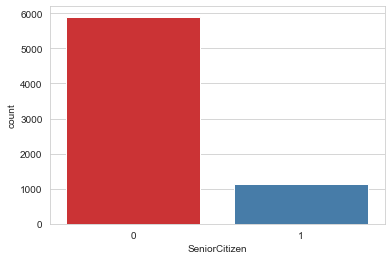

In [52]:
#visulaizing the count of Seniorcitizen

print(df['SeniorCitizen'].value_counts())
sns.countplot(df['SeniorCitizen'],palette='Set1')
plt.show()

Here 0 represents non senior citizens and 1 represents senior citizens. The count of 0 is high compared to 1 which means the number of non seniorcitizens are quite high compared to senior citizens data int he dataset.



No     3641
Yes    3402
Name: Partner, dtype: int64


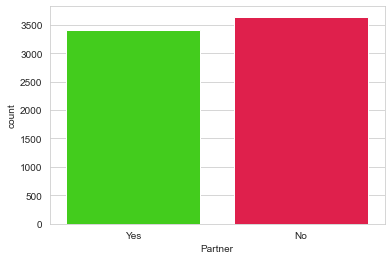

In [53]:
#visulaizing the count of Partner

print(df['Partner'].value_counts())
sns.countplot(df['Partner'],palette='prism')
plt.show()

Non partners are bit high in count of customers having partners.



No     4933
Yes    2110
Name: Dependents, dtype: int64


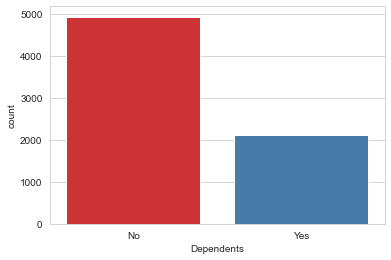

In [54]:
#visulaizing the count of Dependents

print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'],palette='Set1')
plt.show()

The customers who have dependents are less compared to non dependents.



Yes    6361
No      682
Name: PhoneService, dtype: int64


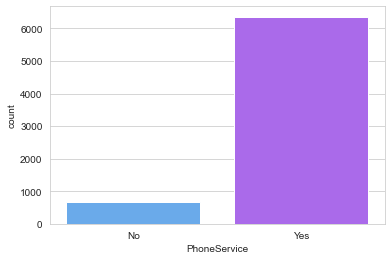

In [55]:
#visulaizing the count of PhoneService

print(df['PhoneService'].value_counts())
sns.countplot(df['PhoneService'],palette='cool')
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.



No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


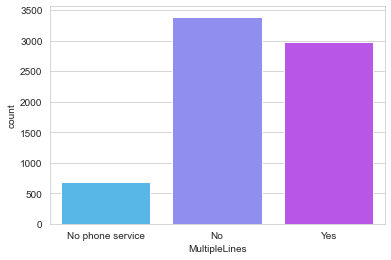

In [56]:
#visulaizing the count of MultipleLines

print(df['MultipleLines'].value_counts())
sns.countplot(df['MultipleLines'],palette='cool')
plt.show()

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.



No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


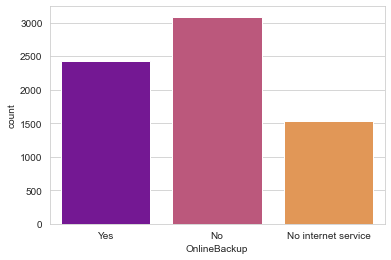

In [57]:
#visulaizing the count of OnlineBackup

print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'],palette='plasma')
plt.show()

We can observe that the customers having no internet services have very les online backup counts compared to others.



No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


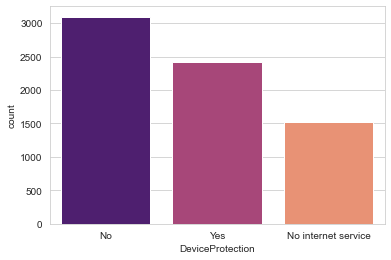

In [58]:
#visulaizing the count of DeviceProtection

print(df['DeviceProtection'].value_counts())
sns.countplot(df['DeviceProtection'],palette='magma')
plt.show()

The customers having NoInternetServices needs online security and who do not own any internet services, they do not need any online security. But from the plot we can observe the majority of customers who have internet serviceshave low online security.



No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


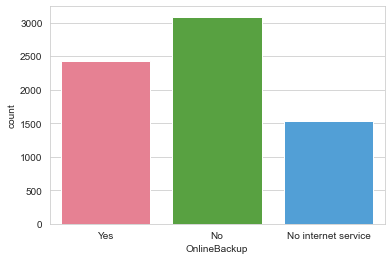

In [60]:
#visulaizing the count of OnlineBackup

print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'],palette='husl')
plt.show()

We can observe that the customers having no internet services have very les online backup counts compared to others.



No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


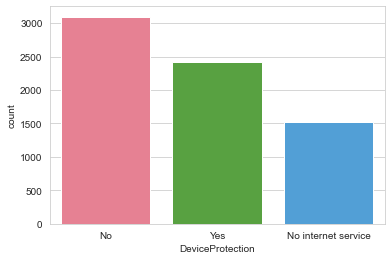

In [63]:
#visulaizing the count of DeviceProtection

print(df['DeviceProtection'].value_counts())
sns.countplot(df['DeviceProtection'],palette='husl')
plt.show()

We can see that the customers who do not have internet access, they do not need any device protection.



No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


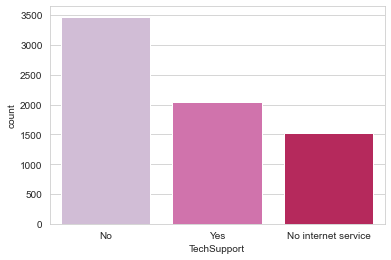

In [64]:
#visulaizing the count of TechSupport

print(df['TechSupport'].value_counts())
sns.countplot(df['TechSupport'],palette='PuRd')
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support.



No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


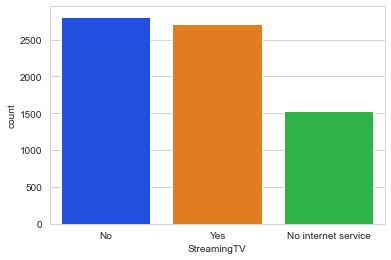

In [66]:
#visulaizing the count of StreamingTV

print(df['StreamingTV'].value_counts())
sns.countplot(df['StreamingTV'],palette='bright')
plt.show()

The customerswho do not use streaming TV have little bit high in numbers than the customers who do use Streaming TV.And the customer who do not own internet they do not have this service much.



No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


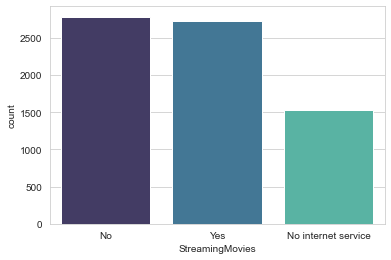

In [67]:
#visulaizing the count of StreamingMovies

print(df['StreamingMovies'].value_counts())
sns.countplot(df['StreamingMovies'],palette='mako')
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.



Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


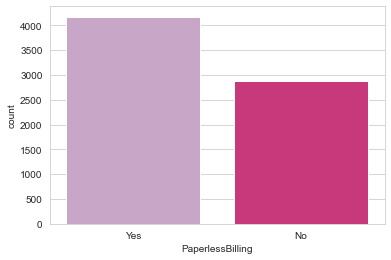

In [68]:
#visulaizing the count of PaperlessBilling

print(df['PaperlessBilling'].value_counts())
sns.countplot(df['PaperlessBilling'],palette='PuRd')
plt.show()

Most of the customers prefer paper billing and average number of customers who do not prefer paper less billing.


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


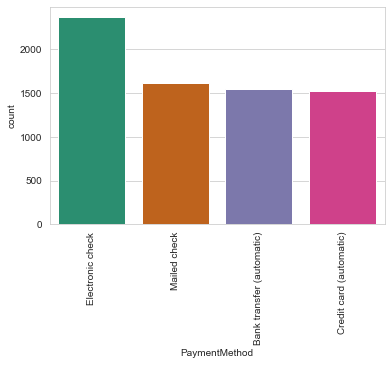

In [70]:
#visulaizing the count of PaymentMethod

print(df['PaymentMethod'].value_counts())
sns.countplot(df['PaymentMethod'],palette='Dark2')
plt.xticks(rotation=90)
plt.show()

Most customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.



# Distribution of columns

Text(0.5, 1.0, 'Distribution of TotalCharges')

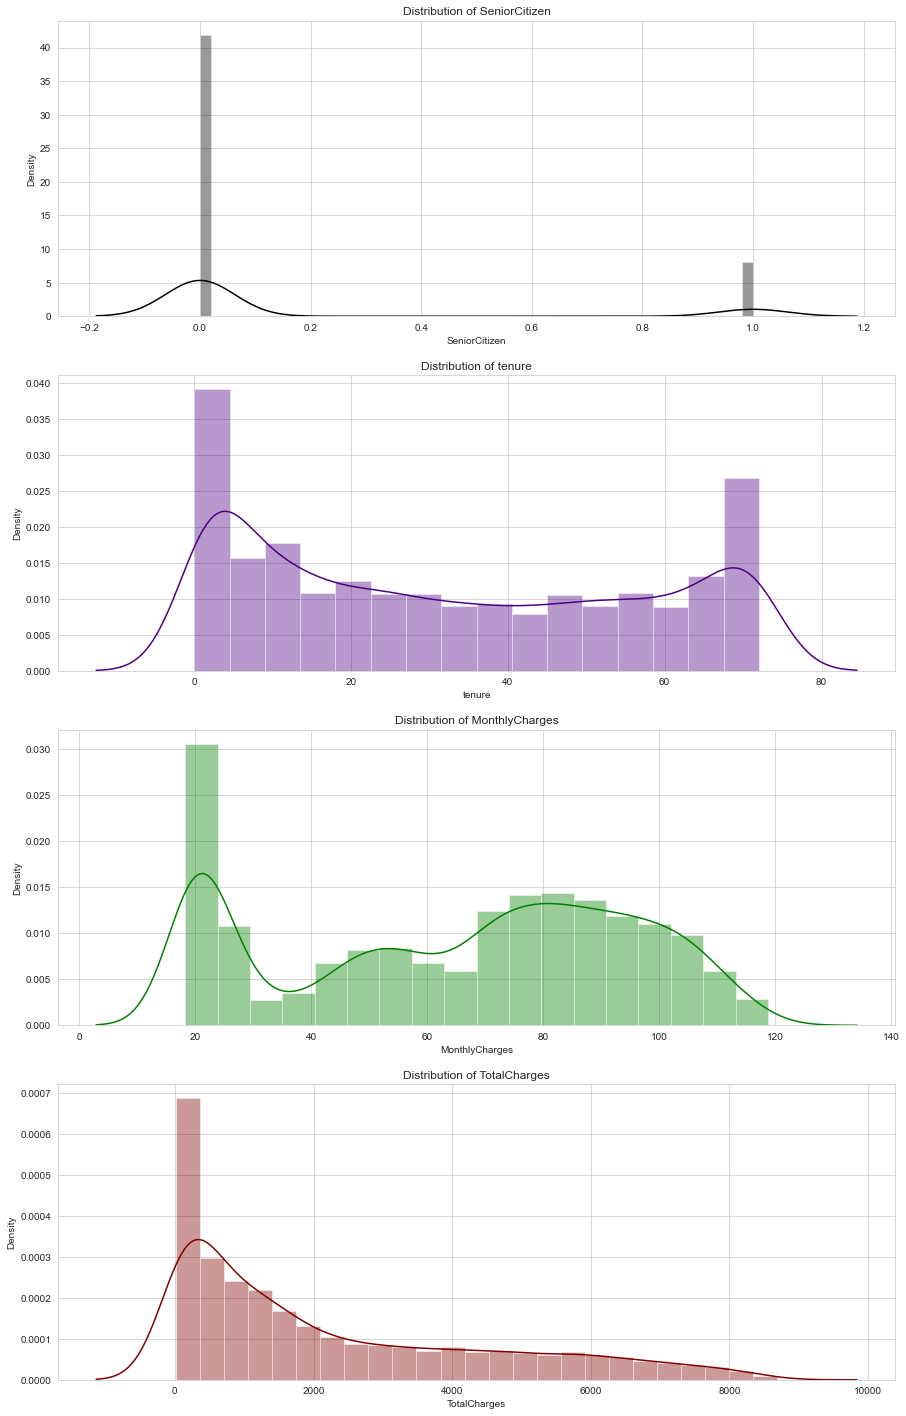

In [100]:
# Let's check how the data has been distributed in remaining column

plt.figure(figsize=(15,25))
plt.subplot(4,1,1)
plt.title('Distribution of SeniorCitizen')
sns.distplot(df['SeniorCitizen'],color='black')
plt.subplot(4,1,2)
sns.distplot(df['tenure'],color='indigo')
plt.title('Distribution of tenure')
plt.subplot(4,1,3)
sns.distplot(df['MonthlyCharges'],color='green')
plt.title('Distribution of MonthlyCharges')
plt.subplot(4,1,4)
sns.distplot(df['TotalCharges'],color='maroon')
plt.title('Distribution of TotalCharges')

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to the right. Other two columns tenure and MonthlyCharges do not have skewness.

# Bivariate Analysis


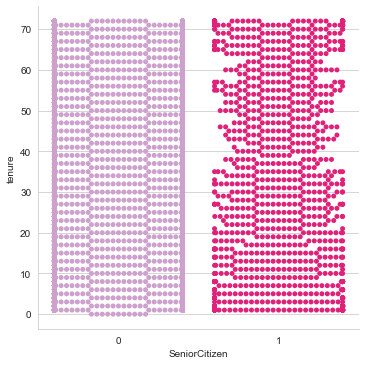

In [104]:
#comapring tenure and seniorcitizen
sns.catplot(x='SeniorCitizen',y='tenure',data=df,kind='swarm',palette='PuRd')
plt.show()

There is no significant between the features, here both the features are in equal length.



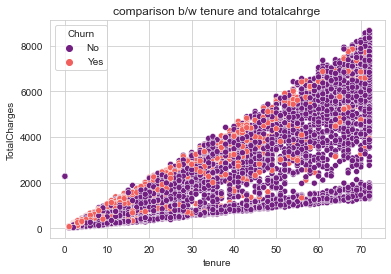

In [109]:
#comparing tenure and Totalcharge

plt.title('comparison b/w tenure and totalcahrge')
sns.scatterplot(x='tenure',y='TotalCharges',data=df,hue='Churn',palette='magma')
plt.show()

Here we can notice the strong linear relation between the features.

As the tenure increses, TotalCharges also increases rapidly. If the customers have low tenure services than there is high chance of churn.


<AxesSubplot:title={'center':'comparison b/w churn and gender'}, xlabel='gender', ylabel='SeniorCitizen'>

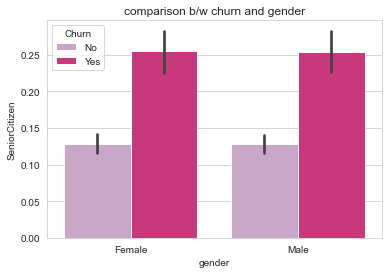

In [111]:
# Comparing gender and SeniorCitizen on the basis of Churn
plt.title('comparison b/w churn and gender')
sns.barplot(x='gender',y='SeniorCitizen',data=df,hue='Churn',palette='PuRd')

There is no significant difference between the columns. The customers churns remains unaffected in gender and SeniorCitizen case.



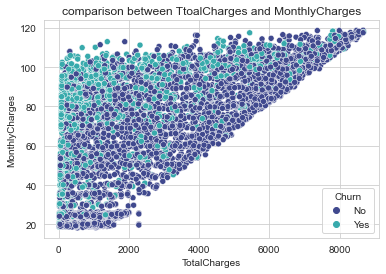

In [112]:
# Comapring TotalCharges and MonthlyCharges
plt.title('comparison between TtoalCharges and MonthlyCharges')
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette='mako')
plt.show()

There is a linear relationship between the features. The customer with high monthly charges have high tendency to stop the services since they have high total charges.

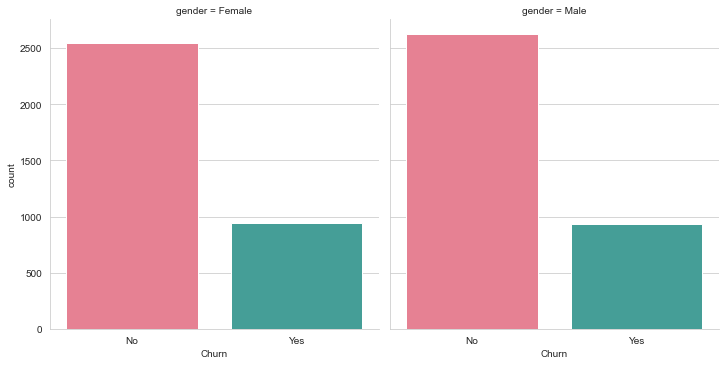

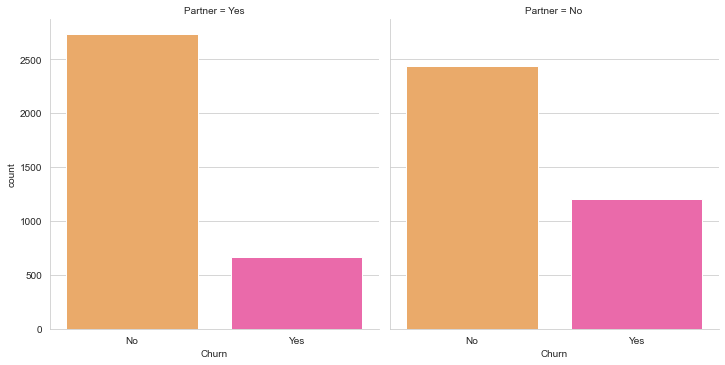

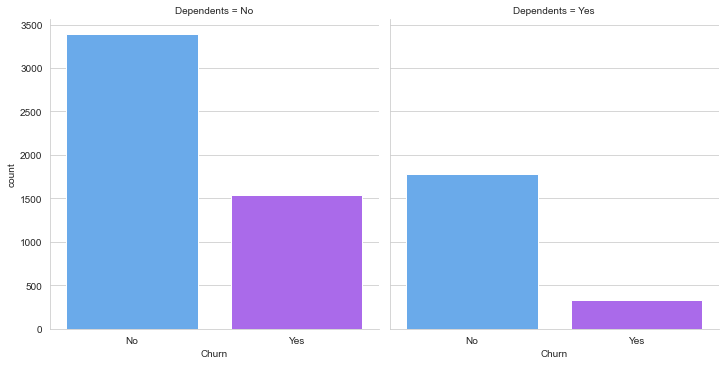

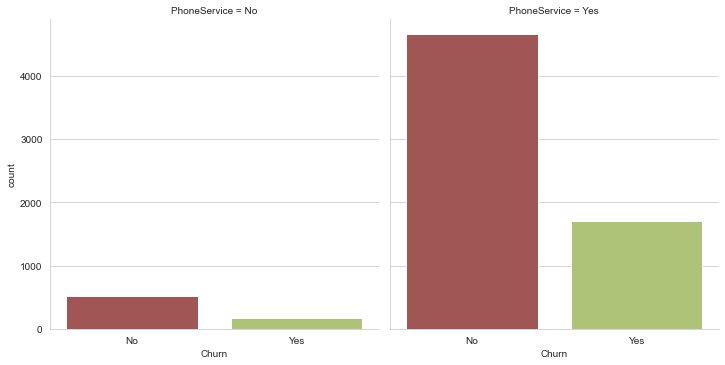

In [114]:
#checking the plot 
sns.catplot(x='Churn',col='gender',data=df,kind='count',palette='husl')


#checking the plot
sns.catplot(x='Churn',col='Partner',data=df,kind="count",palette="spring_r")

#checking the plot
sns.catplot(x='Churn',col='Dependents',data=df,kind='count',palette='cool')

#checking the plot
sns.catplot(x='Churn',col='PhoneService',data=df,kind='count',palette='tab20b_r')



In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned

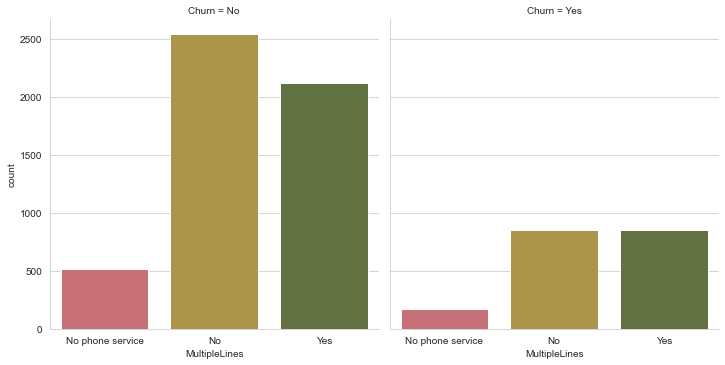

In [115]:
# Checking Churn level and MultipleLines

sns.catplot(x='MultipleLines',col='Churn',data=df,palette='tab20b_r',kind='count')
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

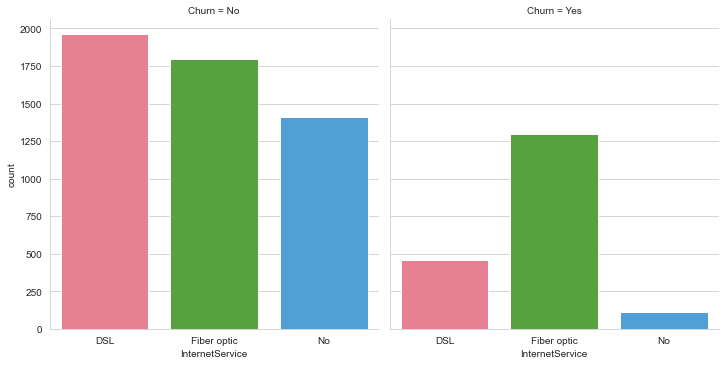

In [116]:
#checking the churn in internetservice

sns.catplot(x='InternetService',col='Churn',palette='husl',kind='count',data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.



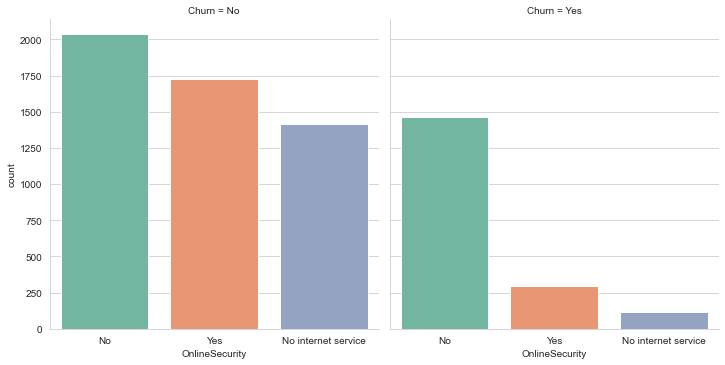

In [117]:
#checking the churn in OnlineSecurity

sns.catplot(x='OnlineSecurity',col='Churn',palette='Set2',kind='count',data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.



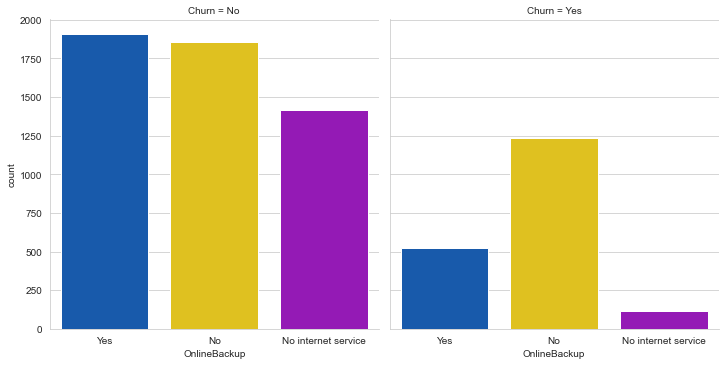

In [118]:
#checking the churn in OnlineBackup

sns.catplot(x='OnlineBackup',col='Churn',palette='prism',kind='count',data=df)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.



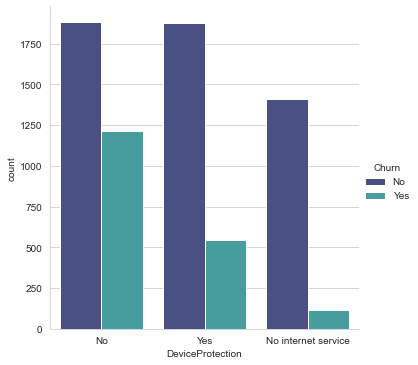

In [120]:
#checking the churn in DeviceProtection

sns.catplot(x='DeviceProtection',hue='Churn',palette='mako',kind='count',data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.



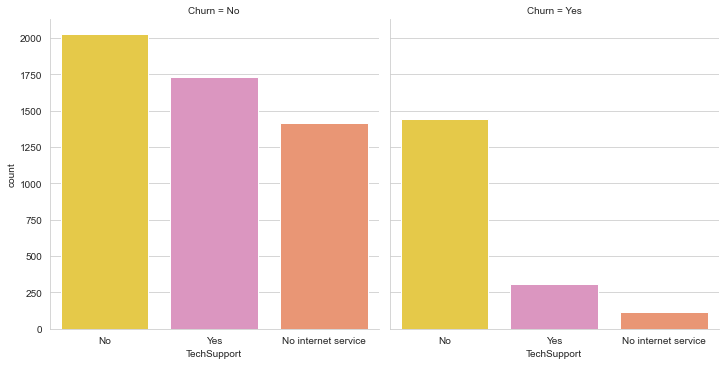

In [121]:
#checking the churn in TechSupport

sns.catplot(x='TechSupport',col='Churn',palette='Set2_r',kind='count',data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio



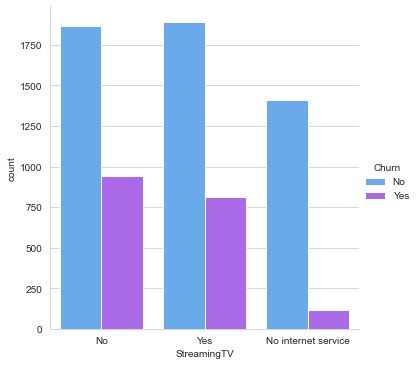

In [123]:
#checking the churn in StreamingTV

sns.catplot(x='StreamingTV',hue='Churn',palette='cool',kind='count',data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.



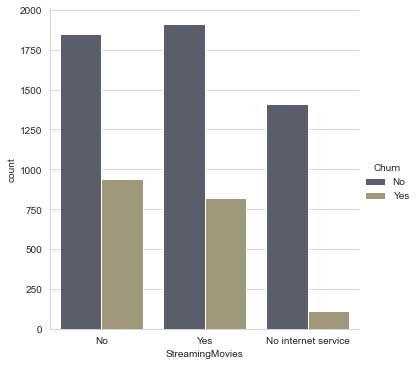

In [124]:
#checking the churn in StreamingMovies

sns.catplot(x='StreamingMovies',hue='Churn',palette='cividis',kind='count',data=df)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services

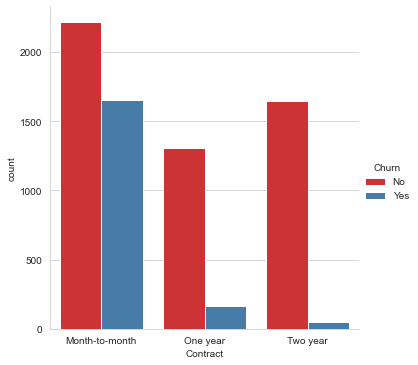

In [126]:
#checking the churn in Contract

sns.catplot(x='Contract',hue='Churn',palette='Set1',kind='count',data=df)
plt.show()

The customers who have churned are mostly having month to month contract.



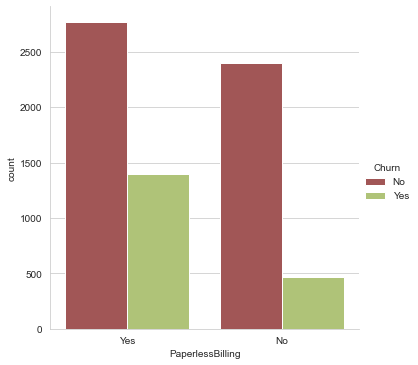

In [131]:
#checking the churn in PaperlessBilling

sns.catplot(x='PaperlessBilling',hue='Churn',palette='tab20b_r',kind='count',data=df)
plt.show()

The customers who prefer paperless billing they have high churn rate.



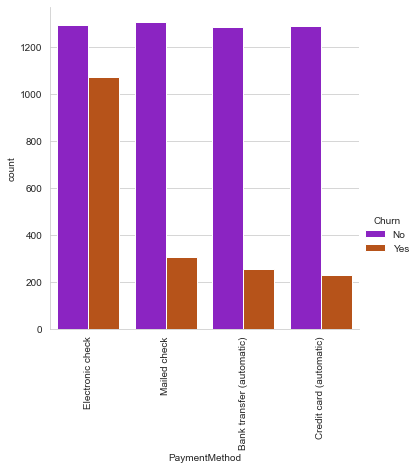

In [133]:
#checking the churn in PaymentMethod

sns.catplot(x='PaymentMethod',hue='Churn',palette='gnuplot',kind='count',data=df)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.



# Multivariate Analysis


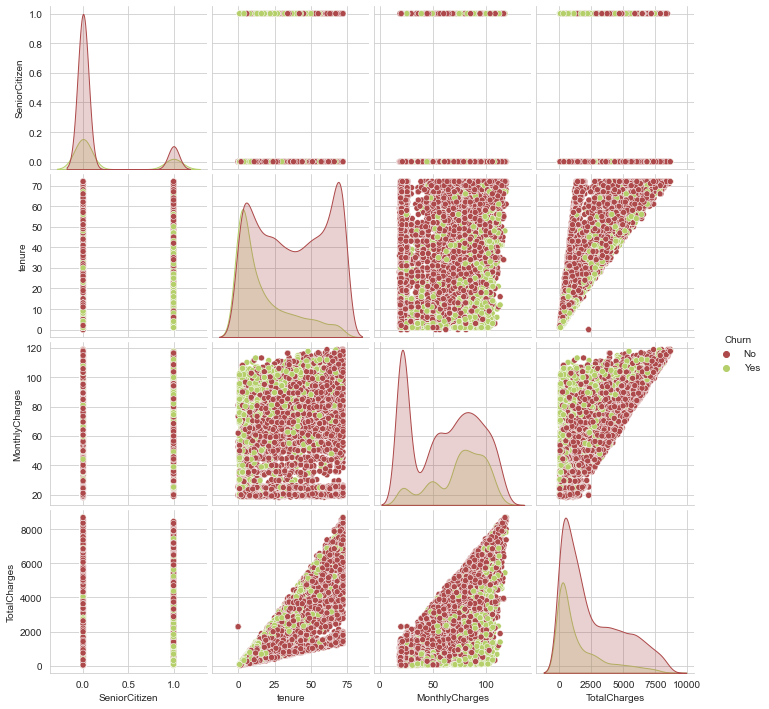

In [134]:
sns.pairplot(df,hue='Churn',palette='tab20b_r')

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers

# Checking the outliers

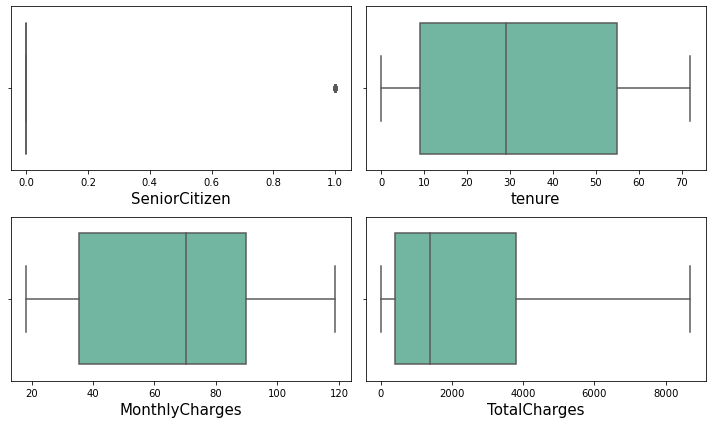

In [25]:
#lets check the outliers 
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.



# Checking skewness

In [26]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data.

Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in natures, lets use cube root method to remove skewness.

# Removing the skewness

In [27]:
# Removing skewness using cuberoot method

df['TotalCharges']=np.cbrt(df['TotalCharges'])

we remove the skewness

In [28]:
#checking the skewness after removing
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

Now skewness is not present

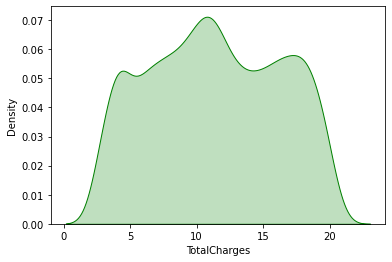

In [29]:
#plot for skewness

sns.distplot(df['TotalCharges'],color='g',kde_kws={'shade':True},hist=False)
plt.show()

This looks almost normal and skewness is also removed.



# Encoding the Categorical columns

In [30]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


Now our data is encoded

# Checking the correlation

In [31]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


this give the correlation b/w dependent and independent variables.

<AxesSubplot:>

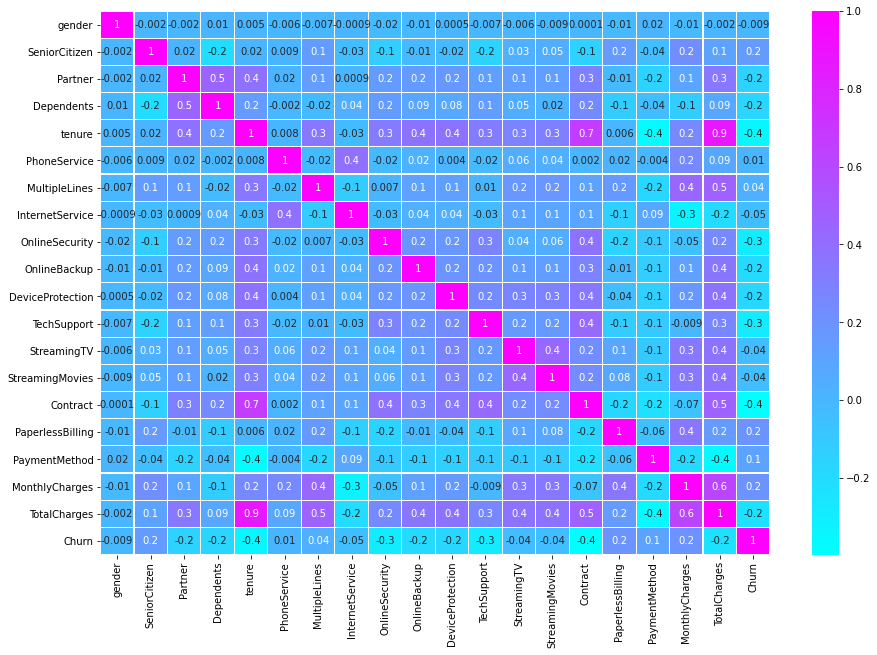

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.1g',linecolor='white',linewidths=.2,cmap='cool',annot=True)

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation

.There is no much positive correlation between the target and features.

.The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

.Also the column gender has very correlation with the label, we can drop it if necessary.




# Visualizing the correlation between label and features using bar plot

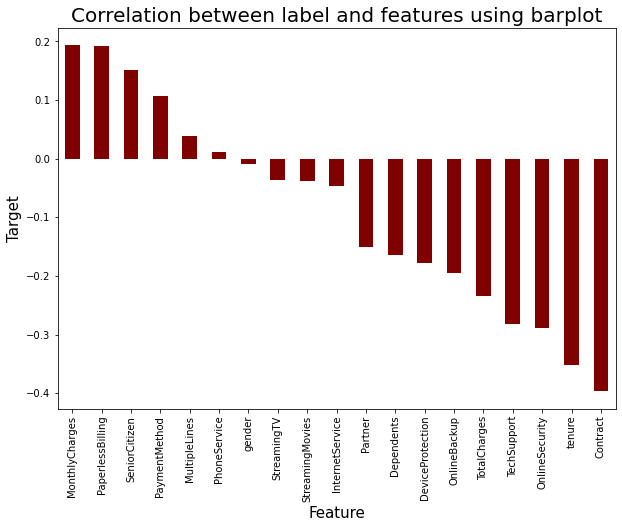

In [33]:
plt.figure(figsize=(10,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='maroon')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and features using barplot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.



# Separing the label and features

In [34]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [35]:
#rows and columns

print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


NOw our data is scaled

# Checking for MultiColinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


high VIF value in Totalcahrge column so we have to drop this column

In [38]:
#Dropping the TotalCharge columns
x.drop('TotalCharges',axis=1,inplace=True)

In [39]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved multicolinearity issue.We can now move ahead for model building.



# Oversampling

In [40]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [41]:
#checking the value count
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Now our data is balanced

# Modeling 



# Finiding the Best random state

In [42]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print('Best accuracy is',maxAcc,'at random state',maxRs)

Best accuracy is 0.8679549114331723 at random state 79


# creating train test split


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRs)

# RandomForestClassifier

In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix :''\n',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 0.8631239935587761
confusion_matrix :
 [[1326  222]
 [ 203 1354]]
classification_report:               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1548
         1.0       0.86      0.87      0.86      1557

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix :''\n',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 0.7855072463768116
confusion_matrix :
 [[1177  371]
 [ 295 1262]]
classification_report:               precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      1548
         1.0       0.77      0.81      0.79      1557

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# DecisionTreeClassifier

In [48]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred=dc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))


accuracy_score: 0.794524959742351
confusion_matrix
 [[1226  322]
 [ 316 1241]]
classification_report               precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      1548
         1.0       0.79      0.80      0.80      1557

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))


accuracy_score: 0.7832528180354267
confusion_matrix
 [[1053  495]
 [ 178 1379]]
classification_report               precision    recall  f1-score   support

         0.0       0.86      0.68      0.76      1548
         1.0       0.74      0.89      0.80      1557

    accuracy                           0.78      3105
   macro avg       0.80      0.78      0.78      3105
weighted avg       0.80      0.78      0.78      3105



# GradientBoostingClassifier

In [50]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))


accuracy_score: 0.8421900161030595
confusion_matrix
 [[1266  282]
 [ 208 1349]]
classification_report               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1548
         1.0       0.83      0.87      0.85      1557

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



# AdaBoostClassifier

In [51]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))


accuracy_score: 0.8273752012882448
confusion_matrix
 [[1233  315]
 [ 221 1336]]
classification_report               precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1548
         1.0       0.81      0.86      0.83      1557

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



# ExtraTreesClassifier

In [52]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))


accuracy_score: 0.8676328502415459
confusion_matrix
 [[1328  220]
 [ 191 1366]]
classification_report               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1548
         1.0       0.86      0.88      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



# cross Validation Score

In [53]:
from sklearn.model_selection import cross_val_score


In [54]:
# Checking cross valiodation score for LogisticRegression

print('cross validation score',cross_val_score(lr,x,y,cv=5).mean())

cross validation score 0.7751279878024577


In [55]:
# Checking cross valiodation score for RandomForest

print('cross validation score',cross_val_score(rf,x,y,cv=5).mean())

cross validation score 0.7751279878024577


In [56]:
# Checking cross valiodation score for DecisionTreeClassifier

print('cross validation score',cross_val_score(dc,x,y,cv=5).mean())

cross validation score 0.7847981358120681


In [57]:
# Checking cross valiodation score for Knn

print('cross validation score',cross_val_score(knn,x,y,cv=5).mean())

cross validation score 0.7894307735772841


In [58]:
# Checking cross valiodation score for GradientBoosting Classifier

print('cross validation score',cross_val_score(gb,x,y,cv=5).mean())

cross validation score 0.833310171078469


In [59]:
# Checking cross valiodation score for ADboostClassifier

print('cross validation score',cross_val_score(ad,x,y,cv=5).mean())

cross validation score 0.8073121277286279


In [60]:
# Checking cross valiodation score for EXtraTreeClsssifier

print('cross validation score',cross_val_score(et,x,y,cv=5).mean())

cross validation score 0.8653925091586638


Extra Trees Classifier model have highest accuracy i.e. 86.76% with 86.53% cross validation score which is good and the difference is too less

# Hyper Parameter Tuning


In [61]:
#ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV


parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [66]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [67]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [71]:
Final_model = ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=200,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.98872785829307


The accuracy of best model is increased after tuning and its 86.98% which is very good

# Plotting ROC and compare AUC for all the models used

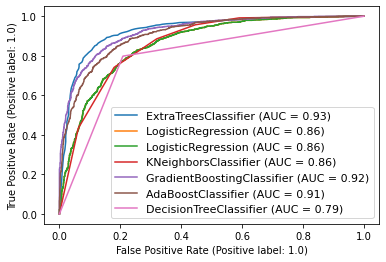

In [75]:
from sklearn.metrics import plot_roc_curve

#checking roc curve for all models
disp = plot_roc_curve(et,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ad, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

 Here we can see area under curve for each model used.



# Plotting ROC and compare AUC for the best model

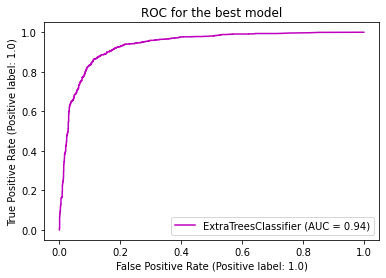

In [77]:
# Let's check the AUC for the best model after hyper parameter tuning
plot_roc_curve(Final_model, x_test, y_test,color='m')
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

# Saving the model


In [78]:
#saving the model

joblib.dump(Final_model,'Telecom_Customer_Churn_Analysis.pkl')

['Telecom_Customer_Churn_Analysis.pkl']

# Predicting the saved model

In [79]:
# Lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1., 1., 1., ..., 1., 1., 0.])

In [80]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,1.0
3102,1.0,1.0
3103,1.0,1.0


Conclusion:
    

In this dataset, we were asked to predict the customer churn which is either Yes or No.

We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.

We selected those who have partner and who have dependents because they have less chance of leaving.

We found that churn is equal for both female and male as we cannot say that females are leaving more or males are.

We also seen that if people have online security and backup, and have techsupport they wouldn't leave.

In case of people using paperlessbilling and electroniccheck, they are found to have high chance at leaving and people who have contract month-to-month, they have a very high chance of leaving.

The data was found to be imbalanced so we used the balancing technique to balance the data by over-sampling the data.

We performed model buildling using many models and we found that Extratreeclassifier was giving good matrix so we selected Extratreeclassifier  model and performed hyperparameter tuning to increase the accuracy.

The final model accuracy was found to be 86.98% and then we saved the final ML model.